In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


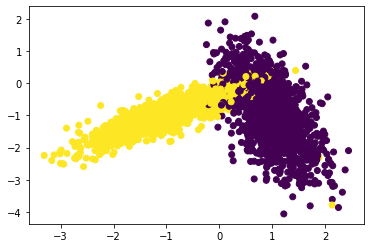

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [3]:
# the function will take train data of x & y 
# KNeighborsClssifier
# paramrange(tuple) to randomly choose 10 K-neighbors
# folds for crossvalidation
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    trainscores = [] # to store train data scores
    testscores = []  # to store cv data scores
    p = param_range
    param = random.sample(range(p[0],p[1]),10)
    # randomly selecting 10 points from paramrange and sorting them in ascending order
    param.sort()
    # for each value of k-neighbors in param
    for k in param:
        trainscores_folds = [] # to store train data scores for each fold 
        testscores_folds = []  # to store cv data scores for each fold
        
        t_pr = int(len(x_train)/folds)
        lst_idx = list(range(len(x_train)))
        # for each fold
        for j in range(folds):
            
            # dividing the indices based on no. of folds randomly
            test_indices = lst_idx[j*t_pr:(j+1)*t_pr]
            train_indices = list(set(lst_idx)-set(test_indices))
            
            
            # train and crossvalidation data
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            
            # fitting the data for KNN
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            
            # predicting the y classification and calculating accuracy score for each fold and each k
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test,Y_predicted))
            
            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train,Y_predicted))
        testscores.append(np.mean(np.array(testscores_folds)))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        
    return param,trainscores,testscores
    

In [15]:
import random
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

classifier = KNeighborsClassifier()
p = (1,50)
folds = 3

param,trainscores,testscores = RandomSearchCV(X_train,y_train,classifier,p,folds)


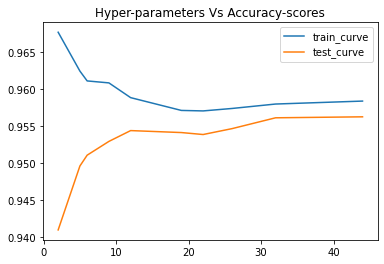

In [16]:
# plotting accuracy scores for each value of K
plt.plot(param,trainscores,label = 'train_curve')
plt.plot(param,testscores,label = 'test_curve')
plt.title('Hyper-parameters Vs Accuracy-scores')
plt.legend()
plt.show()

In [17]:
param

[2, 5, 6, 9, 12, 19, 22, 26, 32, 44]

- Best Hyper-parameter = 32

In [7]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

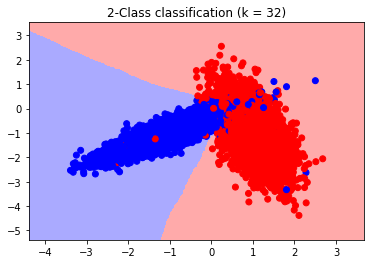

In [18]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 32)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)